<a href="https://colab.research.google.com/github/mens0n/Information-on-the-number-of-passengers-getting-on-and-off-the-Seoul-subway-line-ML-/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%A7%80%ED%95%98%EC%B2%A0_%ED%98%B8%EC%84%A0%EB%B3%84_%EC%97%AD%EB%B3%84_%EC%8B%9C%EA%B0%84%EB%8C%80%EB%B3%84_%EC%8A%B9%ED%95%98%EC%B0%A8_%EC%9D%B8%EC%9B%90_%EC%A0%95%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Business Understanding
## 프로젝트 개요

코로나 시국에 익숙해졌다고는 하지만 가끔 밖으로 나갈 때 사람 많은 곳은 피하고 싶은 생각에 어떤 장소를 피해야 하는지 알아보고 싶을 때가 있을 겁니다. 지하철 이용 승객 수를 확인해보면 혼잡도가 높은 지역을 확인해볼 수 있을 것 같습니다.

이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 서울시 지하철 호선별 역별 승하차 인원 정보 데이터를 분석하고 지하철 역 위치 좌표 데이터를 활용해 특정 호선에서 어떤 역이 가장 혼잡한지 직관적으로 확인해봅니다

## 프로젝트 목표
- 승하차시 시간, 해당 역의 승객 수를 확인하기 위해 개찰구 통과 승객 수 데이터와 지하철 위치좌표 데이터를 활용
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법

## 데이터 확인

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv to 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보 (2).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding = 'cp949')
df.head().T

,0,1,2,3,4
사용월,202112,202112,202112,202112,202112
호선명,1호선,1호선,1호선,1호선,1호선
지하철역,동대문,동묘앞,서울역,시청,신설동
04시-05시 승차인원,803,116,769,37,383
04시-05시 하차인원,15,0,16,2,6
05시-06시 승차인원,12276,2423,8460,1902,7270
05시-06시 하차인원,1913,756,6094,4537,2738
06시-07시 승차인원,8716,3270,11185,2827,7731
06시-07시 하차인원,5492,3915,35735,19095,10318
07시-08시 승차인원,13464,5412,34375,6322,15891


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48986 entries, 0 to 48985
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           48986 non-null  int64 
 1   호선명           48986 non-null  object
 2   지하철역          48986 non-null  object
 3   04시-05시 승차인원  48986 non-null  int64 
 4   04시-05시 하차인원  48986 non-null  int64 
 5   05시-06시 승차인원  48986 non-null  int64 
 6   05시-06시 하차인원  48986 non-null  int64 
 7   06시-07시 승차인원  48986 non-null  int64 
 8   06시-07시 하차인원  48986 non-null  int64 
 9   07시-08시 승차인원  48986 non-null  int64 
 10  07시-08시 하차인원  48986 non-null  int64 
 11  08시-09시 승차인원  48986 non-null  int64 
 12  08시-09시 하차인원  48986 non-null  int64 
 13  09시-10시 승차인원  48986 non-null  int64 
 14  09시-10시 하차인원  48986 non-null  int64 
 15  10시-11시 승차인원  48986 non-null  int64 
 16  10시-11시 하차인원  48986 non-null  int64 
 17  11시-12시 승차인원  48986 non-null  int64 
 18  11시-12시 하차인원  48986 non-null  int64 
 19  12시-

In [4]:
# 사용월 데이터 확인
set(df['사용월'])

{201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112}

In [5]:
sorted(list(set(df['사용월'])))

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112]

In [6]:
# 데이터프레임 호선명 데이터 확인
set(df['호선명'])

{'1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 '9호선2~3단계',
 '9호선2단계',
 '경강선',
 '경부선',
 '경원선',
 '경의선',
 '경인선',
 '경춘선',
 '공항철도 1호선',
 '과천선',
 '분당선',
 '수인선',
 '안산선',
 '우이신설선',
 '일산선',
 '장항선',
 '중앙선'}

In [7]:
# 지하철역 데이터 확인
set(df['지하철역'])

{'4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변',
 '강변(동서울터미널)',
 '강일',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대',
 '고려대(종암)',
 '고색',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '광나루',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문',
 '광화문(세종문화회관)',
 '광흥창',
 '광흥창(서강)',
 '교대',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굴포천',
 '굽은다리',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '낙성대(강감찬)',
 '남구로',
 '남동인더스파크',
 '남부터미널',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남위례',
 '남춘천',
 '남태령',
 '남한산성입구',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',
 '녹양',
 '녹천'

In [8]:
# 지하철역 개수 확인
len(set(df['지하철역']))

581

# Data Understanding

## 데이터 정제
- 데이터를 확인해보니 2017년 3월 2020년 12월까지 수집된 데이터인 것을 알 수 있다
- 가장 최근 한달간 수집된 데이터를 기준으로 특정 호선에서 어떤 역이 가장 혼잡한지 확인하고자 한다

### 2021년 12월 승하차 인원 추출
- 수집된 데이터 중 가장 최근인 데이터만 추출하고 불필요한 컬럼을 제거

In [9]:
# 2021년 12월 총 승객수만 추출
df_recent = df[df['사용월'] == 202112]
df_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,14912,18816,16411,20372,19114,20473,20830,20188,23345,20221,24025,18935,24577,17681,24426,17084,21648,17667,14558,17404,12493,11780,11616,11104,7600,8620,2617,7679,24,1355,0,0,0,0,0,0,20220103
1,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,7697,16182,11396,21689,16817,24866,22871,27413,27745,27233,31397,22238,29900,15386,24201,10434,15857,8412,7128,6011,4797,4448,4328,4922,2608,3963,980,2491,10,1437,1,1,0,1,0,0,20220103
2,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,44195,62290,52865,52223,63018,60591,64741,60427,57303,55157,75713,59298,85760,60717,129054,71864,184200,77500,87213,50899,62761,33524,70343,32014,38334,18709,12519,8703,61,841,0,2,0,0,0,0,20220103
3,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,10058,32091,15981,29806,17428,27421,20577,26735,26865,21996,34727,19517,41288,19300,71334,20574,136819,20216,50959,9584,44297,5619,45585,5417,21428,2794,5284,1713,28,153,0,1,0,0,0,0,20220103
4,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,14137,20784,16604,17520,18380,17529,20266,18041,20668,16573,22767,17617,30233,17970,39687,20597,54451,24853,19057,17181,13301,11550,11994,12367,6876,8680,2280,5913,37,863,0,0,0,0,0,0,20220103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,202112,중앙선,원덕,34,0,268,2,648,107,613,300,838,344,721,436,786,592,615,583,529,650,641,314,728,614,628,673,779,618,498,870,402,622,192,567,99,398,61,537,30,295,4,265,2,17,0,0,0,0,0,0,20220103
605,202112,중앙선,중랑,113,4,5451,586,9456,1849,21861,2906,21109,6137,14044,4793,8132,4061,7645,4305,8129,5790,8084,6490,7323,6433,7081,9000,6986,10285,6981,14991,7053,21927,4357,14099,3236,10217,2910,8397,1734,8239,629,3456,8,239,0,0,0,0,0,0,20220103
606,202112,중앙선,지평,0,0,0,0,0,0,241,275,319,128,9,2,366,298,0,0,1,0,42,104,353,301,1,0,2,0,121,238,50,93,116,203,0,0,33,94,4,72,1,1,0,0,0,0,0,0,0,0,20220103
607,202112,중앙선,팔당,0,0,203,35,596,541,1081,1423,1244,2789,982,3209,913,2541,947,2321,1115,2057,1307,1670,1680,1458,2031,1569,2478,1407,2681,1494,2365,1549,1991,852,1778,563,1374,517,770,387,115,283,0,0,0,0,0,0,0,0,20220103


In [10]:
# 불필요한 작업일자 컬럼 제거
df_recent = df_recent.drop(columns=['작업일자'])
df_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,14912,18816,16411,20372,19114,20473,20830,20188,23345,20221,24025,18935,24577,17681,24426,17084,21648,17667,14558,17404,12493,11780,11616,11104,7600,8620,2617,7679,24,1355,0,0,0,0,0,0
1,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,7697,16182,11396,21689,16817,24866,22871,27413,27745,27233,31397,22238,29900,15386,24201,10434,15857,8412,7128,6011,4797,4448,4328,4922,2608,3963,980,2491,10,1437,1,1,0,1,0,0
2,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,44195,62290,52865,52223,63018,60591,64741,60427,57303,55157,75713,59298,85760,60717,129054,71864,184200,77500,87213,50899,62761,33524,70343,32014,38334,18709,12519,8703,61,841,0,2,0,0,0,0
3,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,10058,32091,15981,29806,17428,27421,20577,26735,26865,21996,34727,19517,41288,19300,71334,20574,136819,20216,50959,9584,44297,5619,45585,5417,21428,2794,5284,1713,28,153,0,1,0,0,0,0
4,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,14137,20784,16604,17520,18380,17529,20266,18041,20668,16573,22767,17617,30233,17970,39687,20597,54451,24853,19057,17181,13301,11550,11994,12367,6876,8680,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,202112,중앙선,원덕,34,0,268,2,648,107,613,300,838,344,721,436,786,592,615,583,529,650,641,314,728,614,628,673,779,618,498,870,402,622,192,567,99,398,61,537,30,295,4,265,2,17,0,0,0,0,0,0
605,202112,중앙선,중랑,113,4,5451,586,9456,1849,21861,2906,21109,6137,14044,4793,8132,4061,7645,4305,8129,5790,8084,6490,7323,6433,7081,9000,6986,10285,6981,14991,7053,21927,4357,14099,3236,10217,2910,8397,1734,8239,629,3456,8,239,0,0,0,0,0,0
606,202112,중앙선,지평,0,0,0,0,0,0,241,275,319,128,9,2,366,298,0,0,1,0,42,104,353,301,1,0,2,0,121,238,50,93,116,203,0,0,33,94,4,72,1,1,0,0,0,0,0,0,0,0
607,202112,중앙선,팔당,0,0,203,35,596,541,1081,1423,1244,2789,982,3209,913,2541,947,2321,1115,2057,1307,1670,1680,1458,2031,1569,2478,1407,2681,1494,2365,1549,1991,852,1778,563,1374,517,770,387,115,283,0,0,0,0,0,0,0,0


## 데이터 시각화
- 2021년 12월 데이터만 추출한 df_recent를 다양한 데이터 시각화 및 혼잡도 분석 진행


### 호선 별 이용객 수 출력
- 추출한 df_recent데이터를 활용해 이용객 수가 가장 많은 호선 순으로 막대그래프를 출력

In [11]:
import matplotlib.font_manager as fm

# 시스템 폰트 체크
sys_font = fm.findSystemFonts()
print(f"sys_font number : {len(sys_font)}")
# 나눔 폰트 체크
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number : {len(nanum_font)}")

sys_font number : 27
nanum_font number : 10


In [12]:
# 나눔 고딕 install
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [13]:
fm._rebuild

<function matplotlib.font_manager._rebuild>

In [25]:
# 폰트 종류를 확인 할 수 있다
print(nanum_font)

['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']


- 여기까지 진행 후에 런타임 초기화를 해주고 다시 실행한다.
- 위 nanum_font nuber가 늘어난걸 확인하고 계속 진행 한다

In [23]:
# 호선별 시간별 평균 승하차 인원
df_line = df_recent.groupby('호선명').mean().reset_index()        # 호선명을 기준으로 평균값을 매긴다
df_line = df_line.drop(columns= '사용월').set_index('호선명')     # 사용월 컬럼을 지우고, 호선명을 index로 설정
df_line = df_line.mean(axis = 1).sort_values(ascending = False)   # df_line의 행을 평균을 매기고, 내림차순으로 정렬
print(type(df_line))
print(df_line.shape)
print(df_line)

<class 'pandas.core.series.Series'>
(25,)
호선명
2호선         29964.934167
1호선         23658.070833
4호선         20607.946314
3호선         16399.211397
경인선         15161.852083
7호선         14658.940359
과천선         13576.359375
경부선         12509.381944
5호선         12377.335937
9호선         12072.545833
분당선         11763.642857
8호선         11524.745370
일산선         10687.954545
안산선         10105.108974
6호선          9100.580128
9호선2~3단계     8132.899038
공항철도 1호선     7468.653274
경원선          7128.642361
중앙선          4684.402778
경의선          4235.212798
우이신설선        3696.434295
수인선          3541.699074
경강선          3025.857955
경춘선          2157.271930
장항선          2097.497024
dtype: float64


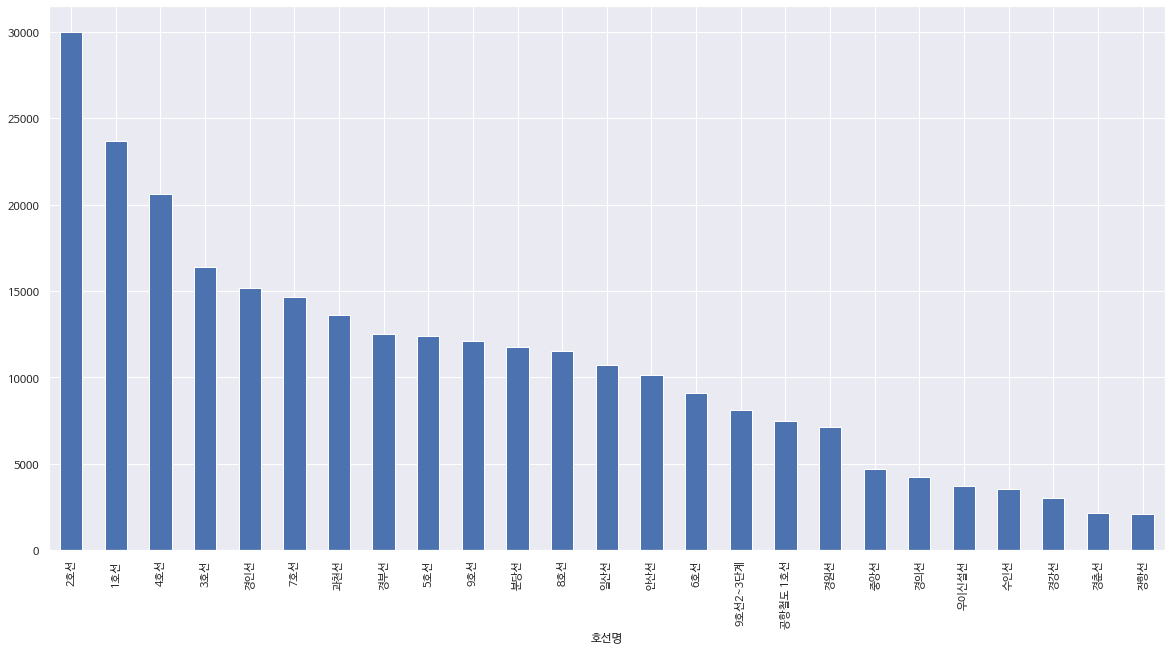

In [24]:
# 그래프 기본 설정
plt.figure(figsize=(20,10))
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

df_line.plot(kind = 'bar')
plt.show()

### 특정 호선에서 역별 평균 승하차 인원
- 다영한 호선에서 역별 평균 승하차 인원이 많은 역은 어디일까, 이용객이 가장 많은 2호선 기준으로 확인

In [33]:
line_2 = '2호선'
df_all_st = df_recent.groupby(['호선명', '지하철역']).mean().reset_index()
df_line_2 = df_all_st[df_all_st['호선명'] == line_2]

df_line_2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202112,166,3,6685,10642,15781,47590,35465,126547,60242,302135,47654,306306,48664,146937,67190,108466,83021,104099,97876,124455,110218,113172,141288,106841,160867,114461,240715,139013,319852,180317,199355,99662,168482,48088,217699,46342,129769,29605,42035,16547,84,100,0,0,0,0,0,0
11,2호선,강변(동서울터미널),202112,18,1,7942,1756,23912,16491,71753,21497,104547,43365,73420,33993,52918,33519,48343,32710,46750,37726,47386,41376,43949,44101,45487,52365,47611,56806,51914,72864,58227,105319,39606,72916,30122,48595,25550,49206,14059,32168,4287,14215,2,518,0,0,0,0,0,0
12,2호선,건대입구,202112,208,8,13413,1997,19761,19680,48833,24337,89277,61083,58544,46694,33136,37605,32855,41779,37892,50928,41943,56862,44426,57169,52162,64607,61727,75418,73714,100823,82823,141810,59025,90549,69652,51651,85718,57903,46950,39338,19029,21145,59,3023,0,0,0,0,0,0
13,2호선,교대(법원.검찰청),202112,15,0,2330,6854,11348,23168,22377,45437,32963,151392,26222,140161,25589,66150,31540,53412,35014,47358,42600,52999,50418,48971,56334,45736,62816,46976,97619,57257,138869,68733,61775,38922,50282,21628,59169,23648,32904,15901,10615,8423,13,92,0,0,0,0,0,0
14,2호선,구로디지털단지,202112,189,4,35938,5067,50662,22065,127991,82922,181460,255587,107057,145979,61037,56436,55511,43231,61444,45971,63825,54487,60412,55180,64305,64404,75942,75513,130266,105968,228606,160467,102165,122599,61542,77830,57096,90291,33477,67545,10386,36322,18,292,0,0,0,0,0,0
15,2호선,구의(광진구청),202112,52,0,12341,1161,23739,9903,62735,14968,111467,40308,63806,23375,33276,18474,28397,18897,28816,22035,28669,24998,26997,26302,27600,35115,32588,39618,36629,54471,42177,92023,21407,64471,16984,40723,17925,46938,12388,32950,5113,15740,14,1385,0,2,0,0,0,0
16,2호선,낙성대(강감찬),202112,15,1,10221,1782,24593,8408,72941,17203,122885,36408,76532,28521,41318,23301,34340,21784,37552,25863,37419,27106,34111,30792,34716,34251,39656,43085,44223,58622,46804,95057,25409,79991,19864,51984,20313,57715,12849,46580,4646,21276,9,1954,0,0,0,0,0,0
17,2호선,당산,202112,33,1,6204,2739,15642,11683,41865,27267,52484,72955,31147,34559,21263,17998,20565,17021,21870,19248,21765,21201,20810,21647,23523,24922,26462,29867,38959,41984,57587,70290,24658,45204,19737,28624,21067,35113,12875,22748,4487,13454,8,625,0,0,0,0,0,0
18,2호선,대림(구로구청),202112,522,8,31201,3501,29640,11200,61853,21483,90255,56203,57671,32280,32687,26139,27661,26723,30417,26674,30621,29174,28787,30653,30095,37619,33696,43392,43043,58399,50051,68271,23855,49392,17095,35498,14515,50470,9044,36822,3116,16108,3,719,0,0,0,0,0,0
19,2호선,도림천,202112,0,0,264,332,1173,755,3013,4137,3459,6150,2165,2642,2067,1501,1514,1180,2603,1822,1600,1471,2244,1716,2263,1431,2821,1905,2976,2248,3870,2721,1882,2364,788,1499,851,1712,341,1153,162,643,1,52,1,1,1,1,0,0


In [40]:
# 승차 인원 컬럼만 추출
df_get_on = pd.DataFrame()       # 새로운 데이터프레임을 생성하여 승차인원만 넣기
df_get_on['지하철역'] = df_line_2['지하철역']     # 2호선 지하철역 이름 넣기

In [41]:
# 3번째 컬럼부터 시작되는 짝수 컬럼을 df_get_on에 넣으면 승차인원만 넣을 수 있다
for i in range(int((len(df_recent.columns)-3)/2)):
  df_get_on[df_line_2.columns[3+2*i]] = df_line_2[df_line_2.columns[3+2*i]]

# 지하철역 컬럼을 index로 설정
df_get_on = df_get_on.set_index('지하철역')
df_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,166,6685,15781,35465,60242,47654,48664,67190,83021,97876,110218,141288,160867,240715,319852,199355,168482,217699,129769,42035,84,0,0,0
강변(동서울터미널),18,7942,23912,71753,104547,73420,52918,48343,46750,47386,43949,45487,47611,51914,58227,39606,30122,25550,14059,4287,2,0,0,0
건대입구,208,13413,19761,48833,89277,58544,33136,32855,37892,41943,44426,52162,61727,73714,82823,59025,69652,85718,46950,19029,59,0,0,0
교대(법원.검찰청),15,2330,11348,22377,32963,26222,25589,31540,35014,42600,50418,56334,62816,97619,138869,61775,50282,59169,32904,10615,13,0,0,0
구로디지털단지,189,35938,50662,127991,181460,107057,61037,55511,61444,63825,60412,64305,75942,130266,228606,102165,61542,57096,33477,10386,18,0,0,0
구의(광진구청),52,12341,23739,62735,111467,63806,33276,28397,28816,28669,26997,27600,32588,36629,42177,21407,16984,17925,12388,5113,14,0,0,0
낙성대(강감찬),15,10221,24593,72941,122885,76532,41318,34340,37552,37419,34111,34716,39656,44223,46804,25409,19864,20313,12849,4646,9,0,0,0
당산,33,6204,15642,41865,52484,31147,21263,20565,21870,21765,20810,23523,26462,38959,57587,24658,19737,21067,12875,4487,8,0,0,0
대림(구로구청),522,31201,29640,61853,90255,57671,32687,27661,30417,30621,28787,30095,33696,43043,50051,23855,17095,14515,9044,3116,3,0,0,0


In [43]:
# 하차 인원만 추출
df_get_off = pd.DataFrame()
df_get_off['지하철역'] = df_line_2['지하철역']

for i in range(int((len(df_recent.columns)-3)/2)):
  df_get_off[df_line_2.columns[4+2*i]] = df_line_2[df_line_2.columns[4+2+i]]
df_get_off = df_get_off.set_index('지하철역')

df_get_off


,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,10642,15781,47590,35465,126547,60242,302135,47654,306306,48664,146937,67190,108466,83021,104099,97876,124455,110218,113172,141288,106841,160867,114461,240715
강변(동서울터미널),1756,23912,16491,71753,21497,104547,43365,73420,33993,52918,33519,48343,32710,46750,37726,47386,41376,43949,44101,45487,52365,47611,56806,51914
건대입구,1997,19761,19680,48833,24337,89277,61083,58544,46694,33136,37605,32855,41779,37892,50928,41943,56862,44426,57169,52162,64607,61727,75418,73714
교대(법원.검찰청),6854,11348,23168,22377,45437,32963,151392,26222,140161,25589,66150,31540,53412,35014,47358,42600,52999,50418,48971,56334,45736,62816,46976,97619
구로디지털단지,5067,50662,22065,127991,82922,181460,255587,107057,145979,61037,56436,55511,43231,61444,45971,63825,54487,60412,55180,64305,64404,75942,75513,130266
구의(광진구청),1161,23739,9903,62735,14968,111467,40308,63806,23375,33276,18474,28397,18897,28816,22035,28669,24998,26997,26302,27600,35115,32588,39618,36629
낙성대(강감찬),1782,24593,8408,72941,17203,122885,36408,76532,28521,41318,23301,34340,21784,37552,25863,37419,27106,34111,30792,34716,34251,39656,43085,44223
당산,2739,15642,11683,41865,27267,52484,72955,31147,34559,21263,17998,20565,17021,21870,19248,21765,21201,20810,21647,23523,24922,26462,29867,38959
대림(구로구청),3501,29640,11200,61853,21483,90255,56203,57671,32280,32687,26139,27661,26723,30417,26674,30621,29174,28787,30653,30095,37619,33696,43392,43043


In [44]:
# 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 DataFrame에 저장
df_line2_mean = pd.DataFrame(index = df_line_2['지하철역'])
df_line2_mean['평균 승차 인원 수'] = df_get_on.mean(axis = 1).astype(int)
df_line2_mean['평균 하차 인원 수'] = df_get_off.mean(axis = 1).astype(int)
df_line2_mean


,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,91379,113359
강변(동서울터미널),34908,44737
건대입구,40464,47184
교대(법원.검찰청),35450,50977
구로디지털단지,65388,81114
구의(광진구청),26380,32494
낙성대(강감찬),30850,37449
당산,20125,26560
대림(구로구청),26909,35061


### 평균 승하차 인원 수 내림차순으로 막대 그래프 출력
- 2호선 기준 2021년 12월 한달간 평균 승차 인원

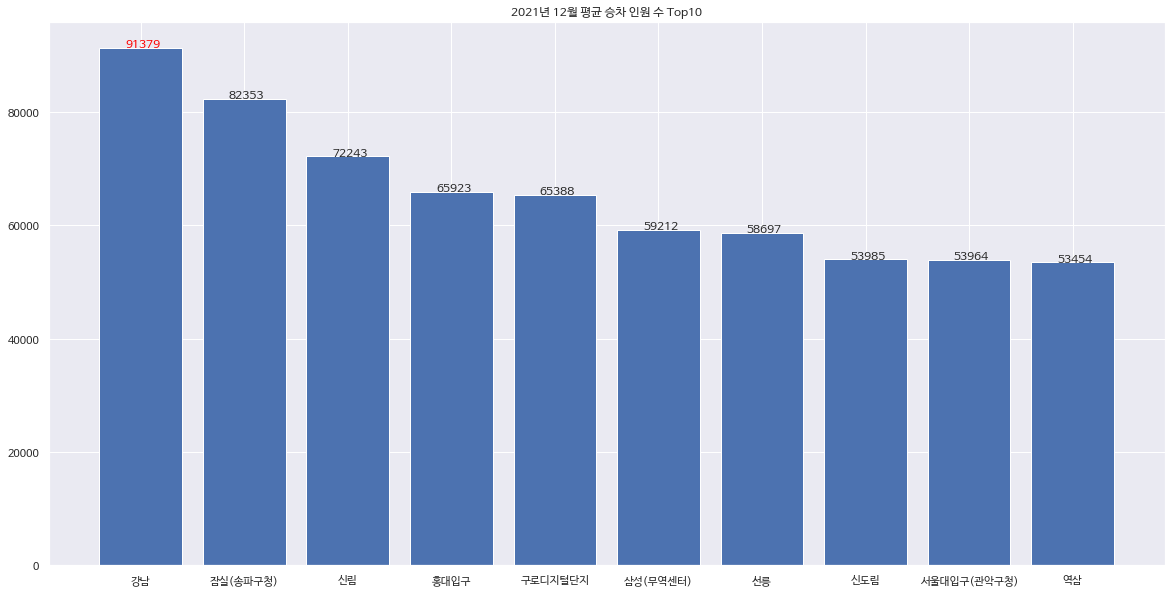

In [51]:
# 승차 인원 수 Top10
top10_line2_on = df_line2_mean.sort_values(by = '평균 승차 인원 수', ascending = False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.bar(top10_line2_on.index, top10_line2_on['평균 승차 인원 수'])

# 평균 승차 인원 수를 y값에 저장하여 첫번째 오는 값에 빨간 글씨로 bar맨 위 중간에 숫자를 표기, 나머지는 검정 글씨로 표기
for x,y in enumerate(list(top10_line2_on['평균 승차 인원 수'])):
  if x == 0:
    plt.annotate(y, (x-0.15, y), color = 'red')
  else:
    plt.annotate(y, (x-0.15, y))

plt.title('2021년 12월 평균 승차 인원 수 Top10')
plt.show()

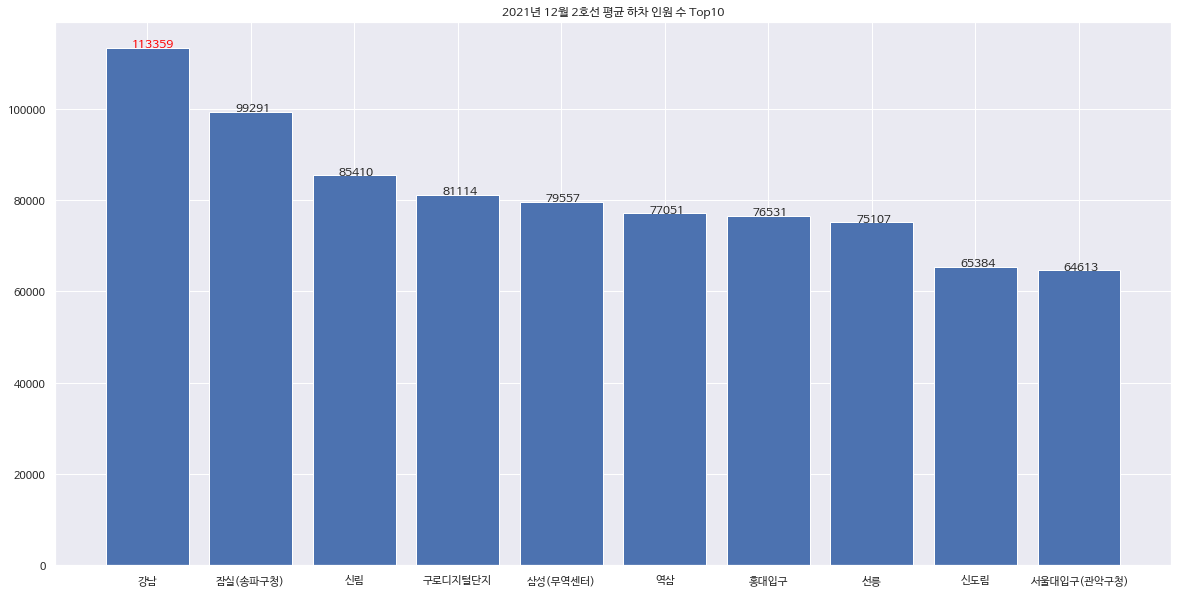

In [55]:
# 하차 인원 수 Top10
top10_line2_off = df_line2_mean.sort_values(by='평균 하차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_line2_off.index, top10_line2_off['평균 하차 인원 수'])
for x,y in enumerate(top10_line2_off['평균 하차 인원 수']):
  if x == 0:
    plt.annotate(y,(x-0.15,y),color = 'red')
  else:
    plt.annotate(y,(x-0.15,y))
plt.title('2021년 12월 2호선 평균 하차 인원 수 Top10')
plt.show()

### 특정 호선의 혼잡 정도와 위치좌표 데이터 병합
- 특정 호선의 지하철 역 마다 지도에 정보를 출력하기 위해서는 각 위치의 좌표정보가 필요합니다
- 이를 해결하기 위해 카카오 API를 활용하여 위도 경도 정보를 가져온다

출처:

https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword
https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

In [71]:
import json
import requests
import folium
import pandas as pd
api_key = 'fbac49a53674ed882ba9a59fda066143'

In [72]:
def addr_to_lat_lon(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
    headers = {"Authorization": "KakaoAK " + api_key}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    return float(match_first['x']), float(match_first['y'])

In [73]:
df = addr_to_lat_lon("서울역")
df